In [190]:
import pandas as pd

In [191]:
df = pd.read_csv('data/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [192]:
x = df.drop('salary_more_then_100k', axis=1) # independent
y = df.salary_more_then_100k #dependent

In [193]:
df.dtypes

company                  object
job                      object
degree                   object
salary_more_then_100k     int64
dtype: object

In [194]:
from sklearn.preprocessing import LabelEncoder
company_=LabelEncoder()
job_=LabelEncoder()
degree_=LabelEncoder()

In [195]:
x['company']=company_.fit_transform(x['company'])
x['job']=job_.fit_transform(x['job'])
x['degree']=degree_.fit_transform(x['degree'])

In [196]:
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [197]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [198]:
model.score(x,y)

1.0

In [199]:
print(dir(model))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_prune_tree', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_X_predict', '_validate_data', 'apply', 'ccp_alpha', 'class_weight', 'classes_', 'cost_complexity_pruning_path', 'criterion', 'decision_path', 'feature_importances_', 'feature_names_in_', 'fit', 'get_depth', 'get_n_leaves', 'get_params', 'max_depth', 'max_features', 'max_features_', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf',

In [200]:
model.feature_importances_

array([0.4, 0.4, 0.2])

In [201]:
print(model.get_depth())
print(model.get_n_leaves())

5
8


model.predict([[2,1,1]])

In [202]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

In [203]:
data = load_iris()

In [204]:
x = data.data
y = data.target

In [205]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

In [206]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [207]:
y_pred = model.predict(x_test)

In [208]:
print('Train data accuracy : ',accuracy_score(y_train, model.predict(x_train))*100)
print('Test data accuracy : ',accuracy_score(y_test, y_pred)*100)

Train data accuracy :  100.0
Test data accuracy :  94.73684210526315


In [209]:
# print(model.feature_names_in_)
print(data.feature_names)
print((model.feature_importances_)*100)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 1.82981053  1.82981053 67.41543418 28.92494477]


In [210]:
#another example

df = pd.read_csv('data/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [211]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [212]:
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})

In [213]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [214]:
x = df.drop('Purchased', axis=1) # independent
y = df.Purchased #dependent

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [215]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [216]:
y_pred = model.predict(x_test)

In [217]:
print('Train data accuracy : ',accuracy_score(y_train, model.predict(x_train))*100)
print('Test data accuracy : ',accuracy_score(y_test, y_pred)*100)

Train data accuracy :  100.0
Test data accuracy :  88.75


In [218]:
# print(model.feature_names_in_)
print(df.columns)
print((model.feature_importances_)*100)


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
[10.93127451  2.84058215 49.04959975 37.17854359]


In [219]:
# look at confusion matrix and classification report to check accuracy of model

Random Forest ML algo belongs to the supervised learning category It can be used for classification and regression problems. It is a upgraded version of decision trees. It is based on the concept of ensemble learning technique that is Bagging(bootstrap aggregation or aggregation on bootstrapped data), which is a process of combining multiple decision tree classifiers to solve a complex problem and impove its performance.

Randeom forest creates a random sampling of decision trees from the training dataset. Random forest classifier is a classifier that contains a number of decision trees on various subsets of the dataset.

Instead of relying on one decision tree, the random forest takes the prediction from each decision tree and based on the majority of votes of prediction, it predicts the final target output.

greater number of trees in the forest leads to higher accuracy.
Why use random forest?

Takes less training time compared to other algos,
It runs efficiently on large datasets, and predicts with a high accuracy
DTs are prone to overfitting, so RF is a good choice for this problem.

In [220]:
from sklearn.datasets import load_digits

digits = load_digits()

In [221]:
%matplotlib inline
import matplotlib.pyplot as plt

In [222]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [223]:
digits.target.shape

(1797,)

In [224]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

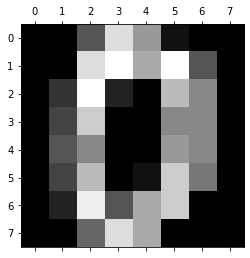

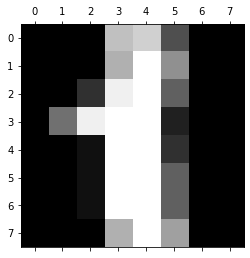

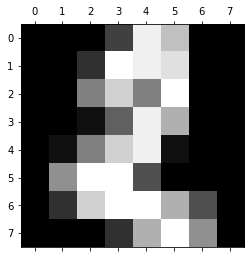

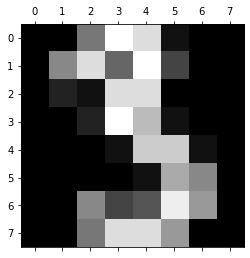

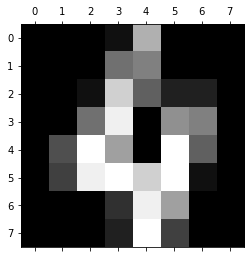

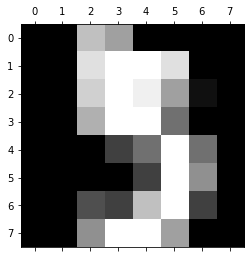

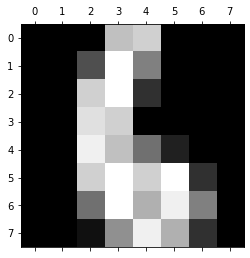

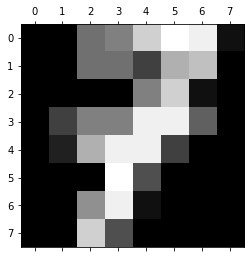

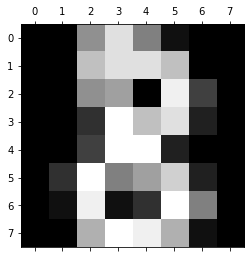

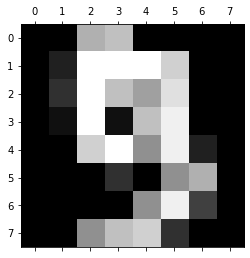

In [225]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])
    plt.show()

In [226]:
df['target'] = digits.target

In [227]:
x = df.drop('target', axis=1) # independent
y = df.target #dependent

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [229]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [230]:
y_pred = model.predict(x_test)

In [231]:
model.score(x_train, y_train)

1.0

In [232]:
model.score(x_test,y_test)

0.9694444444444444

In [233]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

96.94444444444444


In [234]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  1, 37]])

In [235]:
importances = model.feature_importances_
columns = x.columns
i = 0

while i<len(columns):
    print(f"The importance of feature '{columns[i]}' is {round(importances[i]*100,2)}%")
    i+=1

The importance of feature '0' is 0.0%
The importance of feature '1' is 0.3%
The importance of feature '2' is 2.31%
The importance of feature '3' is 0.97%
The importance of feature '4' is 1.11%
The importance of feature '5' is 1.81%
The importance of feature '6' is 0.89%
The importance of feature '7' is 0.1%
The importance of feature '8' is 0.0%
The importance of feature '9' is 1.18%
The importance of feature '10' is 2.45%
The importance of feature '11' is 0.61%
The importance of feature '12' is 1.43%
The importance of feature '13' is 3.1%
The importance of feature '14' is 0.48%
The importance of feature '15' is 0.06%
The importance of feature '16' is 0.0%
The importance of feature '17' is 0.62%
The importance of feature '18' is 2.35%
The importance of feature '19' is 2.36%
The importance of feature '20' is 2.91%
The importance of feature '21' is 5.36%
The importance of feature '22' is 0.87%
The importance of feature '23' is 0.02%
The importance of feature '24' is 0.01%
The importance o

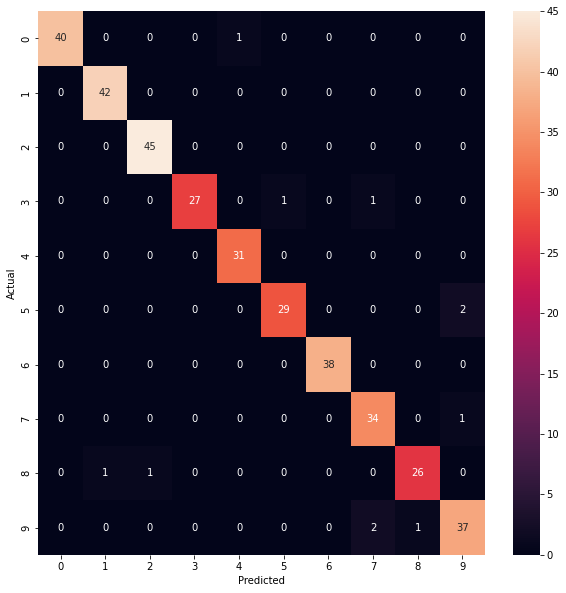

In [236]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [237]:
# another example of random forest

iris = load_iris()

In [238]:
print(iris.data.shape)

(150, 4)


In [239]:
df = pd.DataFrame(iris.data)

In [240]:
df['target'] = iris.target

In [241]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.20, random_state=50)


In [242]:
model = RandomForestClassifier(n_estimators=2000,random_state=1,criterion='entropy', max_depth=5)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=2000,
                       random_state=1)

In [243]:
model.score(x_test,y_test)

0.9666666666666667

In [244]:
model.score(x_train,y_train)

1.0

In [245]:
importances = model.feature_importances_
columns = df.drop('target', axis=1).columns
i=0

while i < len(columns): 
    print('test')
    print(f"The importance of feature '{columns[i]}' is {round(importances[i]*100,2)}%")
    i+=1

test
The importance of feature '0' is 10.28%
test
The importance of feature '1' is 2.33%
test
The importance of feature '2' is 43.9%
test
The importance of feature '3' is 43.49%


In [246]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(x_test))
cm

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]])

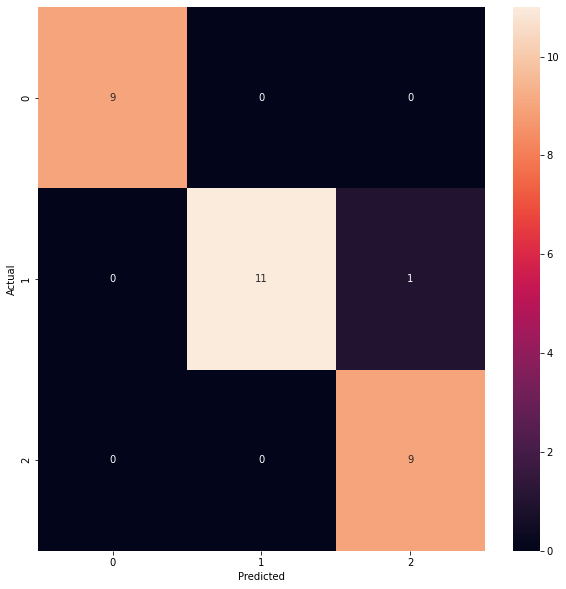

In [247]:
# import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [248]:
# another example with weather dataset
# objectice-predicting max temp of tom for a city
# Target values are conts

In [251]:
df = pd.read_csv('data/temps443dc9b4a1fc.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [252]:
df.dtypes

year                int64
month               int64
day                 int64
week               object
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
dtype: object

In [253]:
df.shape

(348, 12)

In [256]:
df.isnull().sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [258]:
features = pd.get_dummies(df)
features.shape

(348, 18)

In [259]:
features.dtypes

year                int64
month               int64
day                 int64
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
week_Fri            uint8
week_Mon            uint8
week_Sat            uint8
week_Sun            uint8
week_Thurs          uint8
week_Tues           uint8
week_Wed            uint8
dtype: object

In [261]:
x = features.drop('actual', axis=1) # independent
y = features.actual #dependent

In [262]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [278]:
model = RandomForestClassifier(n_estimators=1000,max_depth=3,random_state = 1)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=1000, random_state=1)

In [279]:
model.score(x_train,y_train)

0.4367816091954023

In [280]:
model.score(x_test,y_test)

0.10344827586206896

In [281]:
errors = abs(prediction-y_test)

NameError: name 'prediction' is not defined